0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74


IndexError: list index out of range

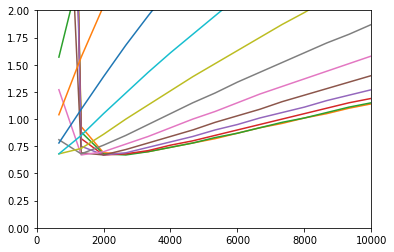

In [259]:
import os
import csv
import sys
import math
import matplotlib.pyplot as plt
import numpy as np

file = open("電界分布計算結果.csv")
csv_reader = csv.reader(file)

n = []
r = []
z = []
V = []
Er = []
Ez = []
E = []
alpha = []
pcmhg = [i for i in range (1, 76)] #P(cmHg)
#print(pcmhg)
ppa = [(101325.0/760.0) * k * 10 for k in pcmhg]
ptorr = [i * 0.00750062 for i in ppa] #P(torr)
p = [i for i in range (0, 50)]

n = []
pd = []
vs_list = []
vs_path_list = []
d = 0.5
K = 10

path_list = [1,102,203,305,406,507,609,711,812,914,1016,1118,1220,1322]

#データ読み込み
for row in csv_reader:
    n.append(row[0])
    r.append(float(row[1])*10)
    z.append(float(row[2])*10)
    V.append(float(row[3]))
    Er.append(float(row[4]))
    Ez.append(float(row[5]))
    E.append(float(row[6])*1000)

vs_min_list = []
    
for i in range (0, 13):
    vs_min_list.append([])

for k in range (0, len(ptorr)):
    print(k)
    vs_path_list = []
    for path in range (0,13):  #すべてのpathを試す
        vs = 0
        integral = 0
        while (integral < K):   #Vを変えて試す　積分がKを上回ったらおわり
            vs += 0.01      #Vを0Vから0.1ずつ増やしていく
    
            #数値積分-------------------------------
    
            integral = 0
            for i in range (path_list[path]+1, path_list[path+1]): #z=0~0.5で積分 (gap=0.5, r=0のデータを使う)
                Enew = vs * E[i]  #vsに合わせてEも調整
            
                #print(z[i])
                #alphaの計算  % 
                if(Enew/ptorr[k]<31.6):
                    #print(" v=",vs," integ=",integral, " alpha=",alpha)
                    alpha = 0                    
                elif (31.6 <= Enew/ptorr[k] and Enew/ptorr[k] < 60):
                    #print(" v=",vs," integ=",integral, " alpha=",alpha)
                    alpha = ptorr[k]/10000.0*(1.047*(Enew/ptorr[k]-28.5)**2-12.6)
                elif (60.0 <= Enew/ptorr[k] and Enew/ptorr[k] < 100.0):
                    #print(" v=",vs," integ=",integral, " alpha=",alpha)
                    alpha = (1.0-0.00674755*(Enew/ptorr[k]-60.0))*ptorr[k]/10000.0*1.047*((Enew/ptorr[k]-28.5)**2-12.6)
                elif (Enew/ptorr[k] > 100.0):
                    #print(" v=",vs," integ=",integral, " alpha=",alpha)
                    alpha = 15.0 * ptorr[k] * math.exp(-365.0/(Enew/ptorr[k]))
            
                integral += np.sqrt((z[i]-z[i-1])**2+(r[i]-r[i-1])**2)*0.1*alpha  #積分
                #print(np.sqrt((z[i]-z[i-1])**2+(r[i]-r[i-1])**2))
            
            #------------------------------------
        
            if (vs>10): break

        vs_min_list[path].append(vs)

    pd.append(ppa[k]*d)   #[Pa・mm]
    vs_list.append(vs)

plt.plot(pd,vs_list)
plt.xlim(0,10000)
plt.ylim(0,2)

for i in range (0,14):
    plt.plot(pd,vs_min_list[i])


In [215]:
for i in range (0, len(vs_path_list)):
    plt.plot(pd,vs_list)
